In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark as ps
import scipy.stats as stats
import sys
sys.path.append("..")
from src.support_functions import fixing_datetime

plt.style.use('ggplot')

In [2]:
!ls


Untitled.ipynb          covid19_data.ipynb      turnstile_usage.ipynb
__pycache__             median_income_nyc.ipynb


## Loading Dataset into Pandas DateFrame for Turnstile Datasets

In [3]:
turnstile2019_df = pd.read_csv('../data/Turnstile_Usage_Data__2019.csv', low_memory=False)
turnstile2020_df = pd.read_csv('../data/Turnstile_Usage_Data__2020.csv', low_memory=False)

In [4]:
turnstile2019_df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A033,R170,02-06-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/2019,00:00:00,REGULAR,769115,559221
1,A033,R170,02-00-04,14 ST-UNION SQ,LNQR456W,BMT,12/27/2019,00:00:00,REGULAR,6483080,4945335
2,A033,R170,02-00-03,14 ST-UNION SQ,LNQR456W,BMT,12/27/2019,00:00:00,REGULAR,7191422,8417203
3,A033,R170,02-00-02,14 ST-UNION SQ,LNQR456W,BMT,12/27/2019,00:00:00,REGULAR,14983900,14554087
4,A033,R170,02-06-01,14 ST-UNION SQ,LNQR456W,BMT,12/27/2019,00:00:00,REGULAR,71047673,20925389


In [5]:
turnstile2020_df.head()

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/16/2020,00:00:00,REGULAR,7472987,2542504
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/16/2020,04:00:00,REGULAR,7472992,2542505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/16/2020,08:00:00,REGULAR,7473010,2542560
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/16/2020,12:00:00,REGULAR,7473070,2542683
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/16/2020,16:00:00,REGULAR,7473238,2542716


## Fixing DateTime

In [6]:
# turnstile2019_df['Date'] = pd.to_datetime(turnstile2019_df.Date)
# turnstile2020_df['Date'] = pd.to_datetime(turnstile2020_df.Date)

In [7]:
# turnstile2020_df.head()

In [8]:
# df['Date'] = df.YR.astype(str) + '-' + df.MN.astype(str) + '-' + df.DAY.astype(str)  
# df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')

# start_date = '2018-07-20'
# end_date = '2019-08-10'
# mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
# df_18_19 = df.loc[mask]
# daily_18_19 = df_18_19.groupby(['Date']).mean()

In [9]:
# start_date = '2020-03-01'
# end_date = '2020-09-30'
# date_range = (turnstile2020_df['Date'] >= start_date) & (turnstile2020_df['Date'] <= end_date)
# ts_df_2020 = turnstile2020_df.loc[date_range]

In [10]:
# start_date = '2019-03-01'
# end_date = '2019-09-30'
# date_range = (turnstile2019_df['Date'] >= start_date) & (turnstile2019_df['Date'] <= end_date)
# ts_df_2019 = turnstile2019_df.loc[date_range]

In [11]:
ts_df_2019 = fixing_datetime(turnstile2019_df)

In [12]:
ts_df_2020 = fixing_datetime(turnstile2020_df)

## Grouping by Date, Unit(station), SCP(turnstile) for 2019

In [13]:
gb2019 = ts_df_2019[['Unit', 'SCP', 'Date', 'Entries']].groupby(['Date', 'Unit', 'SCP']).agg([min, max])

In [14]:
gb2019.reset_index()

Date  Unit       SCP  Entries         
                                       min      max
0      2019-03-02  R001  00-00-00  4119945  4120912
1      2019-03-02  R001  00-00-01  3333074  3333808
2      2019-03-02  R001  00-00-02   578591   578898
3      2019-03-02  R001  00-00-03  2586201  2586497
4      2019-03-02  R001  00-00-04   547373   547578
...           ...   ...       ...      ...      ...
966646 2019-09-30  R572  01-03-00   242745   242972
966647 2019-09-30  R572  01-03-01   281251   281510
966648 2019-09-30  R572  01-03-02   423398   423760
966649 2019-09-30  R572  01-03-03   735175   735886
966650 2019-09-30  R572  01-03-04  1251796  1253111

[966651 rows x 5 columns]

In [15]:
gb2019.columns


MultiIndex([('Entries', 'min'),
            ('Entries', 'max')],
           )

In [16]:
gb2019['Total'] = gb2019[('Entries', 'max')] - gb2019[('Entries', 'min')]
gb2019.drop(gb2019[gb2019['Total'] < 1000].index, inplace=True)
gb2019.drop(gb2019[gb2019['Total'] > 10000].index, inplace=True)

In [17]:
gb2019.sort_values(['Total'], ascending=False)

Entries           Total
                              min      max       
Date       Unit SCP                              
2019-05-16 R046 02-00-04  2534354  2544354  10000
2019-09-03 R541 00-04-04       10     9935   9925
2019-06-10 R551 00-01-05       86     9891   9805
2019-05-14 R046 02-00-04  2512858  2522656   9798
2019-05-22 R046 02-00-02  1696198  1705962   9764
...                           ...      ...    ...
2019-09-26 R238 01-00-01  1342265  1343265   1000
2019-05-28 R012 04-00-02  9236408  9237408   1000
2019-07-23 R131 03-06-01  2553631  2554631   1000
2019-09-17 R176 02-00-00  3333437  3334437   1000
2019-05-24 R374 00-00-02  8097773  8098773   1000

[362307 rows x 3 columns]

In [18]:
# gb_2019 = gb2019['Total_per_SCP']
# gb_2019

In [19]:
#data.groupby(level=[0, 1]).sum()
sum_per_station_2019 = gb2019.groupby(level=[0, 1]).sum()
sum_per_station_2019

Entries              Total
                        min         max       
Date       Unit                               
2019-03-02 R010    96703374    96716422  13048
           R011  5026738034  5026758958  20924
           R012  1277985590  1278000791  15201
           R013     7589748     7590787   1039
           R014       13632       14673   1041
...                     ...         ...    ...
2019-09-30 R551     1440422     1457371  16949
           R552     1895392     1928787  33395
           R570    19101317    19122574  21257
           R571    19065353    19083349  17996
           R572    12923544    12936368  12824

[70565 rows x 3 columns]

In [20]:
# sum_per_station_2019.sort_values(['Total_per_SCP'], ascending=True)

In [21]:
sum_per_date_2019 = sum_per_station_2019.groupby(level=[0]).sum()
sum_per_date_2019

Entries                  Total
                     min           max         
Date                                           
2019-03-02   58968476124   58969813392  1337268
2019-03-03   33890625007   33891482903   857896
2019-03-04  113021017868  113024172442  3154574
2019-03-05  137117293877  137122120053  4826176
2019-03-06  136713004869  136717806764  4801895
...                  ...           ...      ...
2019-09-26  138649693215  138654622671  4929456
2019-09-27  137396344668  137400988194  4643526
2019-09-28   66585985818   66587615104  1629286
2019-09-29   36548678307   36549681822  1003515
2019-09-30  115470719299  115474266696  3547397

[199 rows x 3 columns]

In [22]:
len(sum_per_station_2019)

70565

In [23]:
gb2019.columns

MultiIndex([('Entries', 'min'),
            ('Entries', 'max'),
            (  'Total',    '')],
           )

## Grouping by Date, Unit(station), SCP(turnstile) for 2020

In [24]:
gb2020 = ts_df_2020[['Unit', 'SCP', 'Date', 'Entries']].groupby(['Date', 'Unit', 'SCP']).agg([min, max])

In [25]:
gb2020['Total'] = gb2020[('Entries', 'max')] - gb2020[('Entries', 'min')]
gb2020.drop(gb2020[gb2020['Total'] < 1000].index, inplace=True)
gb2020.drop(gb2020[gb2020['Total'] > 10000].index, inplace=True)

In [26]:
# gb_2020 = gb2020['Total']
# gb_2020_backup = gb2020.copy()

In [27]:
# Filter all rows for which the player's 
# age is greater than or equal to 25 
# df.drop(df[df['Age'] < 25].index, inplace = True)
# gb2020.drop(gb2020[gb2020['Total_per_SCP']==0].index, inplace=True)

In [28]:
sum_per_station_2020 = gb2020.groupby(level=[0, 1]).sum()
sum_per_station_2020

Entries              Total
                        min         max       
Date       Unit                               
2020-03-01 R010    64967419    64975577   8158
           R011  5135715860  5135732599  16739
           R012     9596889     9605312   8423
           R017      242236      243340   1104
           R018    94466153    94487583  21430
...                     ...         ...    ...
2020-09-25 R451    18785230    18786604   1374
           R551      598681      599688   1007
           R552     2312749     2318193   5444
           R570     7347053     7349863   2810
           R571     2632012     2633394   1382

[9788 rows x 3 columns]

In [29]:
sum_per_date_2020 = sum_per_station_2020.groupby(level=[0]).sum()
sum_per_date_2020

Entries                  Total
                     min           max         
Date                                           
2020-03-01   35777676746   35778425703   748957
2020-03-02  148773527102  148777775321  4248219
2020-03-03  145112047757  145116447911  4400154
2020-03-04  144716505331  144720898537  4393206
2020-03-05  148870546697  148874922717  4376020
...                  ...           ...      ...
2020-09-21    8885404480    8885634075   229595
2020-09-22   11790850384   11791107302   256918
2020-09-23   12038229298   12038517118   287820
2020-09-24   13420011384   13420285006   273622
2020-09-25   11718088753   11718367459   278706

[162 rows x 3 columns]

In [30]:
sum_per_date_2020.std()

Entries  min    3.240857e+10
         max    3.240946e+10
Total           8.918797e+05
dtype: float64

In [31]:
sum_per_date_2020.mean()

Entries  min    1.216763e+10
         max    1.216794e+10
Total           3.077568e+05
dtype: float64

## Plotting

In [32]:
sum_per_date_2019.head()

Entries                  Total
                     min           max         
Date                                           
2019-03-02   58968476124   58969813392  1337268
2019-03-03   33890625007   33891482903   857896
2019-03-04  113021017868  113024172442  3154574
2019-03-05  137117293877  137122120053  4826176
2019-03-06  136713004869  136717806764  4801895

In [33]:
sum_per_date_2019['week_avg_2019'] = sum_per_date_2019.iloc[:,2].rolling(window=7).mean()

In [34]:
sum_per_date_2019.head(170)

Entries                  Total week_avg_2019
                     min           max                       
Date                                                         
2019-03-02   58968476124   58969813392  1337268           NaN
2019-03-03   33890625007   33891482903   857896           NaN
2019-03-04  113021017868  113024172442  3154574           NaN
2019-03-05  137117293877  137122120053  4826176           NaN
2019-03-06  136713004869  136717806764  4801895           NaN
...                  ...           ...      ...           ...
2019-08-28  126379339673  126383289450  3949777  2.980972e+06
2019-08-29  128406472168  128410427919  3955751  3.009462e+06
2019-08-30  117151372735  117154840495  3467760  3.015244e+06
2019-08-31   49751189464   49752376812  1187348  2.995183e+06
2019-09-01   26383204973   26384031299   826326  2.990091e+06

[170 rows x 4 columns]

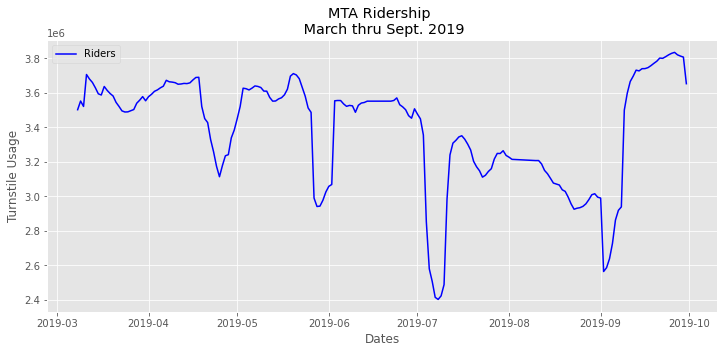

In [42]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(sum_per_date_2019['week_avg_2019'], color='blue', label='Riders')
ax.set_title('MTA Ridership \n March thru Sept. 2019')
ax.set_xlabel('Dates')
ax.set_ylabel('Turnstile Usage')
ax.legend()
plt.savefig('../img/ridership_2019', dpi=80)

In [43]:
sum_per_date_2020['week_avg_2020'] = sum_per_date_2020.iloc[:,2].rolling(window=7).mean()

In [44]:
min_2019 = sum_per_date_2019['Total'].min()
max_2019 = sum_per_date_2019['Total'].max()
print('Minimum Ridership in 1 Individual Day 2019: {0}'.format(min_2019))
print('Maximum Ridership in 1 Individual Day 2019: {0}'.format(max_2019))

Minimum Ridership in 1 Individual Day 2019: 581114
Maximum Ridership in 1 Individual Day 2019: 4931671


In [45]:
min_2020 = sum_per_date_2020['Total'].min()
max_2020 = sum_per_date_2020['Total'].max()
print('Minimum Ridership in 1 Individual Day 2020: {0}'.format(min_2020))
print('Maximum Ridership in 1 Individual Day 2020: {0}'.format(max_2020))

Minimum Ridership in 1 Individual Day 2020: 1002
Maximum Ridership in 1 Individual Day 2020: 4400154


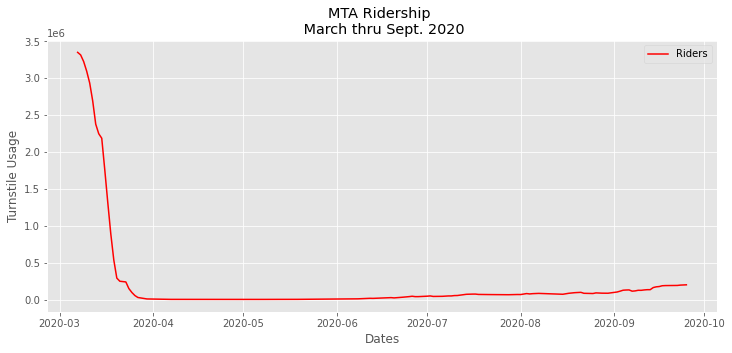

In [46]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(sum_per_date_2020['week_avg_2019'], color='red', label='Riders')
ax.set_title('MTA Ridership \n March thru Sept. 2020')
ax.set_xlabel('Dates')
ax.set_ylabel('Turnstile Usage')
ax.legend()
plt.savefig('../img/ridership_2020', dpi=80)

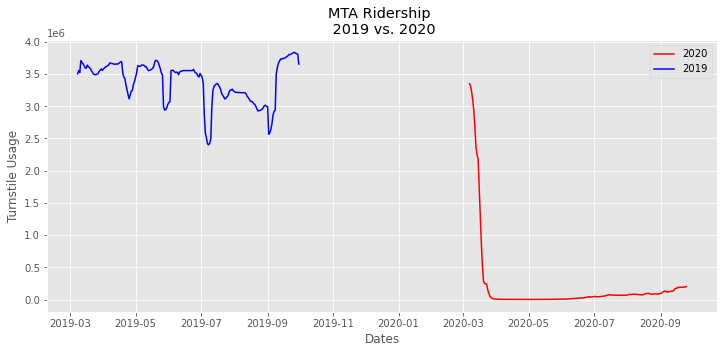

In [47]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(sum_per_date_2020['week_avg_2020'], color='red', label=2020)
ax.plot(sum_per_date_2019['week_avg_2019'], color='blue', label=2019)
ax.set_title('MTA Ridership \n 2019 vs. 2020')
ax.set_xlabel('Dates')
ax.set_ylabel('Turnstile Usage')
ax.legend()
plt.savefig('../img/ridership_2019_vs_2020', dpi=80)

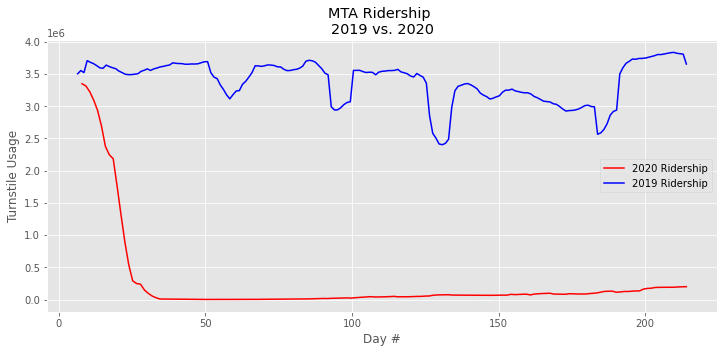

In [48]:
fig, ax = plt.subplots(figsize=(12,5))
x1 = np.linspace(0, 214, num=162)
x2 = np.linspace(0, 214, num=199)
ax.plot(x1, sum_per_date_2020['week_avg_2020'], color='red', label='2020 Ridership')
ax.plot(x2, sum_per_date_2019['week_avg_2019'], color='blue', label='2019 Ridership')
ax.set_title('MTA Ridership \n2019 vs. 2020')
ax.set_xlabel('Day #')
ax.set_ylabel('Turnstile Usage')
ax.legend()
plt.savefig('../img/ridership_2019_vs_2020_2', dpi=80)

In [50]:
stats.ttest_ind(sum_per_date_2019['week_avg_2019'].dropna(), sum_per_date_2020['week_avg_2020'].dropna(), equal_var=False )

Ttest_indResult(statistic=53.20656382203368, pvalue=8.146563428977898e-125)